# INFO 2950 Project

Robin Ahn, Yama Bazger, Grace Myers, and Kaylah Nicholson (ordered alphabetically by last name)

**This will serve as a preliminary Jupyter drawing board for our project** 
Create sections and cells as needed



## Section 1
Firstly, we will import all the relevant libraries that will help us with our data analysis here.



In [25]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
#kor_purpose_translated2 is the relatively cleaned dataset
#underscores "12_000" in the increase decrease column are supposed to be commas, not underscores



First things first, we import the csv file and convert them to a pandas readable dataframe.


In [26]:
df_age = pd.read_csv('enter_korea_by_age.csv')
df_tourists = pd.read_csv('Table 2.csv')
df_gender = pd.read_csv('enter_korea_by_gender.csv')
df_purpose = pd.read_csv('enter_korea_by_purpose.csv')
df_musicvideos = pd.read_csv('kpop_music_videos.csv')
merged_df = pd.merge(df_age, df_gender, on=['date', 'nation'])
merged_df = pd.merge(merged_df, df_purpose, on=['date', 'nation'])
korea_tourist2 = pd.read_csv('20231013060940_방한 외래관광객 성별.csv', encoding='cp949')
korea_purpose = pd.read_csv('20231013061930_방한 외래관광객 목적별.csv', encoding='cp949')
kor_purpose_translated = pd.read_csv('20231013065211_방한 외래관광객 목적별-2 -  20231013065211_Korea Outpatient Department.csv')

In [27]:
kor_purpose_translated.columns.values[1] = "Continents"

In [28]:
kor_purpose_translated.head()

,Base date,Continents,country name,Purpose classification,personnel,Same period last year,increase/decrease rate
0,201601,Entire continent,year,tourism,865064.0,723255.0,19.6
1,201601,Entire continent,year,commercial,15867.0,17686.0,-10.3
2,201601,Entire continent,year,Public,3316.0,3094.0,7.2
3,201601,Entire continent,year,Study Abroad,9352.0,7752.0,20.6
4,201601,Entire continent,year,etc,183832.0,165267.0,11.2


In [29]:
merged_df.head()

,date,nation,visitor_x,growth_x,share_x,age0-20,age21-30,age31-40,age41-50,age51-60,...,female,crewman,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,...,231722,13581,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,...,129029,2427,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,...,56202,947,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,...,22729,995,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,...,1787,35,2570,-12.376406,0.232621,2506,2,0,17,45


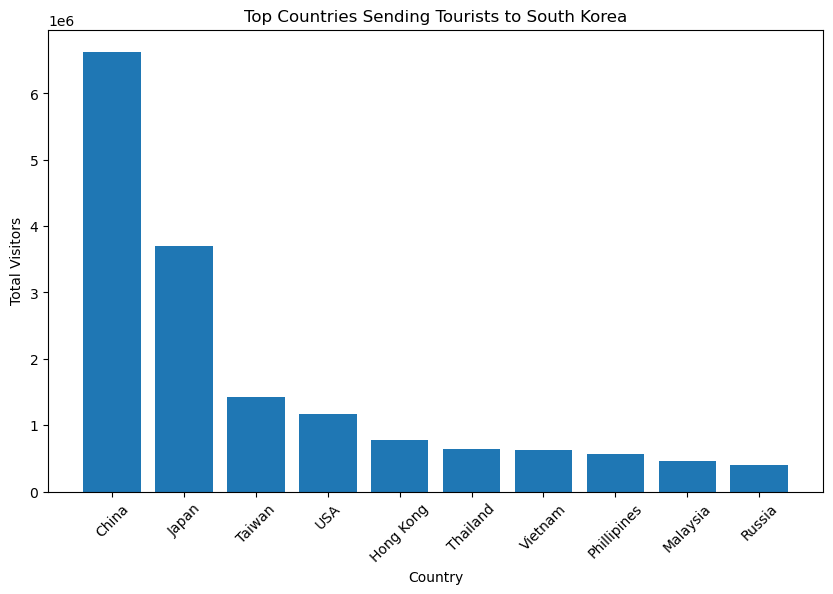

In [30]:
tourist_patterns = merged_df.groupby('nation')['visitor'].sum().reset_index()
tourist_patterns = tourist_patterns.sort_values(by='visitor', ascending=False)
top_countries = tourist_patterns.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_countries['nation'], top_countries['visitor'])
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.title('Top Countries Sending Tourists to South Korea')
plt.xticks(rotation=45)
plt.show()

The following code does a `GET` request to the web host for the specified filename. HTTP is the protocol used to make web requests. It has a series of "status codes" that tell you the result of request. 200 is success. Others you have probably seen: 404 is "page not found", 403 is "you do not have access". Codes starting with 3-- are often redirects. 500 means there is a bug in the server-side code.

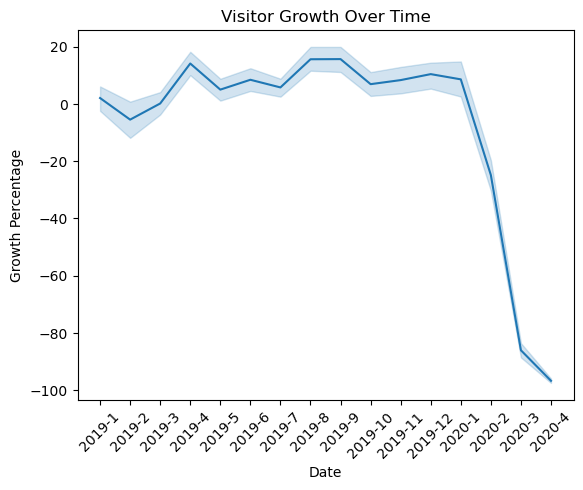

In [31]:
sns.lineplot(x='date', y='growth', data=df_age)
plt.xlabel('Date')
plt.ylabel('Growth Percentage')
plt.title('Visitor Growth Over Time')
plt.xticks(rotation=45)
plt.show()

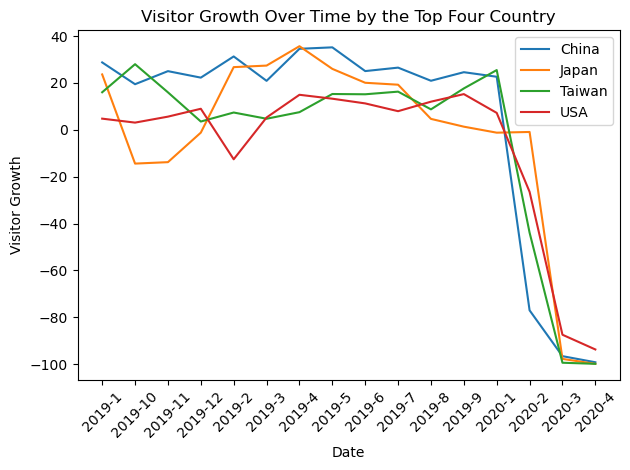

In [32]:
# Group by date and nation, and calculate the sum of growth
country_growth = merged_df.groupby(['date', 'nation'])['growth'].sum().reset_index()
countries_of_interest = ['China', 'Japan', 'Taiwan', 'USA']
filtered_growth = country_growth[country_growth['nation'].isin(countries_of_interest)]
# Create a line plot for each country
for country in countries_of_interest:
    country_data = filtered_growth[filtered_growth['nation'] == country]
    plt.plot(country_data['date'], country_data['growth'], label=country)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Visitor Growth')
plt.title('Visitor Growth Over Time by the Top Four Country')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
print(tourist_patterns)

             nation  visitor
12            China  6629318
27            Japan  3695581
52           Taiwan  1424629
56              USA  1170719
20        Hong Kong   783159
53         Thailand   644523
59          Vietnam   624921
40      Phillipines   560570
30         Malaysia   455722
44           Russia   400628
22        Indonesia   319442
45        Singapore   263056
11           Canada   231090
38  Overseas Korean   211216
4        Austrailia   194998
21            India   160252
55               UK   159830
18          Germany   135174
32         Mongolia   133611
17           France   123393
58       Uzbekistan   102088
33          Myanmar    86977
3       Asia others    84892
28       Kazakhstan    61077
29            Macao    58329
1     Africa others    54320
26            Italy    54245
15    Europe others    52069
10         Cambodia    50289
2    America others    47597
35      New Zealand    44792
34       Netherland    44743
0              *GCC    38103
54           T

In [34]:
melted_df = pd.melt(merged_df, id_vars=['nation'], value_vars=age_groups, var_name='Age Group', value_name='Visitors')

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Age Group', y='Visitors', ci=None)
plt.xlabel('Age Group')
plt.ylabel('Visitors')
plt.title('Visitors by Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

NameError: name 'age_groups' is not defined

In [ ]:
korea_purpose_translated.head()

In [36]:
# Remove leading and trailing whitespaces from column values using index locations
kor_purpose_translated.iloc[:, 0] = kor_purpose_translated.iloc[:, 0].str.strip()  # Index 0 for 'Base date'
kor_purpose_translated.iloc[:, 1] = kor_purpose_translated.iloc[:, 1].str.strip()  # Index 1 for 'Continent'
kor_purpose_translated.iloc[:, 2] = kor_purpose_translated.iloc[:, 2].str.strip()  # Index 2 for 'Country name'

# Define the conditions for each column using index locations
condition_base_date = (kor_purpose_translated.iloc[:, 0] == 'sum')  # Using index 0 for 'Base date'
condition_continent = kor_purpose_translated.iloc[:, 1].isin([' Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 1 for 'Continent'
condition_country_name = kor_purpose_translated.iloc[:, 2].isin(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 2 for 'Country name'
condition_purpose = kor_purpose_translated.iloc[:, 3].isin([' entire'])

# Find the indices of rows that meet the conditions
rows_to_remove = kor_purpose_translated[condition_base_date | condition_continent | condition_country_name | condition_purpose].index

# Remove the rows that meet the specified conditions
kor_purpose_translated2 = kor_purpose_translated.drop(rows_to_remove)

In [37]:
kor_purpose_translated2.head(-10)

,Base date,Continents,country name,Purpose classification,personnel,Same period last year,increase/decrease rate
12,201601,Asia,china,tourism,456636.0,327225.0,39.5
13,201601,Asia,china,commercial,3723.0,4310.0,-13.6
14,201601,Asia,china,Public,140.0,165.0,-15.2
15,201601,Asia,china,Study Abroad,4383.0,3778.0,16
16,201601,Asia,china,etc,57099.0,58867.0,-3
...,...,...,...,...,...,...,...
37476,202308,Oceania,australia,tourism,10561.0,3891.0,171.4
37477,202308,Oceania,australia,commercial,47.0,87.0,-46
37478,202308,Oceania,australia,Public,69.0,34.0,102.9
37479,202308,Oceania,australia,Study Abroad,108.0,109.0,-0.9


In [38]:
print(kor_purpose_translated.head())

  Base date        Continents  country name  Purpose classification  \
0    201601  Entire continent          year                 tourism   
1    201601  Entire continent          year              commercial   
2    201601  Entire continent          year                  Public   
3    201601  Entire continent          year            Study Abroad   
4    201601  Entire continent          year                     etc   

    personnel   Same period last year  increase/decrease rate  
0    865064.0                723255.0                    19.6  
1     15867.0                 17686.0                   -10.3  
2      3316.0                  3094.0                     7.2  
3      9352.0                  7752.0                    20.6  
4    183832.0                165267.0                    11.2  


In [39]:
value = kor_purpose_translated.iloc[1, 1]
print(value)
len(value)

Entire continent


16

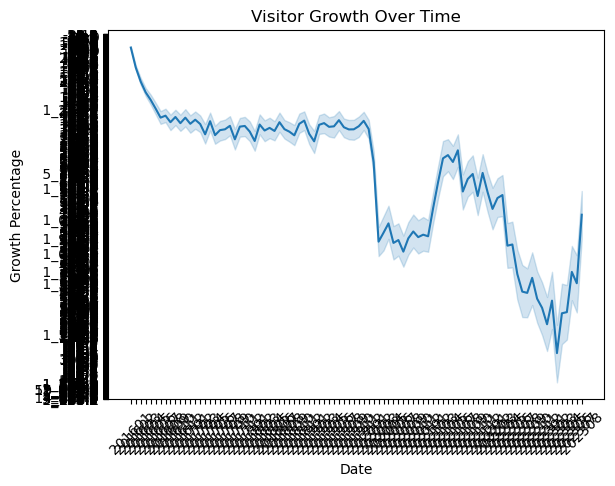

In [40]:
sns.lineplot(x='Base date', y=' increase/decrease rate', data=kor_purpose_translated2)
plt.xlabel('Date')
plt.ylabel('Growth Percentage')
plt.title('Visitor Growth Over Time')
plt.xticks(rotation=45)
plt.show()

In [43]:
result = kor_purpose_translated2[' Purpose classification'].str.contains('entire', case=False).sum()
print(result)

0


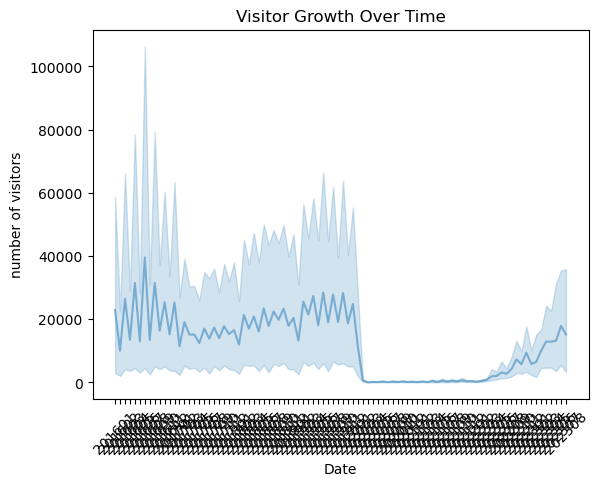

In [42]:
tourist_patterns2 = kor_purpose_translated2.groupby(' country name')[' personnel'].sum().reset_index()
tourist_patterns2 = tourist_patterns.sort_values(by='visitor', ascending=False)

n = 10  # Adjust 'n' to control the level of downsampling
downsampled_data = kor_purpose_translated2.iloc[::n]

# Create a line plot with downsampled data
sns.lineplot(x='Base date', y=' personnel', data=downsampled_data, alpha=0.5)

# Label the axes and add a title
plt.xlabel('Date')
plt.ylabel('number of visitors')
plt.title('Visitor Growth Over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:

# Create a line plot with downsampled data
top_countries2 = tourist_patterns2.head(5)
sns.lineplot(x='nation', y='visitor', data=top_countries2)


# Label the axes and add a title
plt.xlabel('Date')
plt.ylabel('number of visitors')
plt.title('Visitor Growth Over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(5, 6))
plt.bar(top_countries2['nation'], top_countries2['visitor'])
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.title('Top Countries Sending Tourists to South Korea')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pattern = r'_'
result = kor_purpose_translated2[' increase/decrease rate'].str.contains(pattern)

# Filter the DataFrame to show the rows with values containing underscores
rows_with_underscore = kor_purpose_translated2[result]
rows_with_underscore.head()

In [ ]:
kor_por = kor_purpose_translated2.copy()
kor_por[' increase/decrease rate'] = kor_por[' increase/decrease rate'].str.replace('_', '').astype(float)

In [ ]:
tourist_patterns3 = kor_por.groupby(' country name')[' increase/decrease rate'].sum().reset_index()
tourist_patterns3 = tourist_patterns.sort_values(by='visitor', ascending=False)

n = 10  # Adjust 'n' to control the level of downsampling
downsampled_data = kor_por.iloc[::n]

# Create a line plot with downsampled data
sns.lineplot(x='Base date', y=' increase/decrease rate', data=downsampled_data, alpha=0.5)

# Label the axes and add a title
plt.xlabel('Date')
plt.ylabel('number of visitors')
plt.title('Visitor Growth Over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
sns.lineplot(x='Base date', y=' increase/decrease rate', data=kor_por)
plt.xlabel('Date')
plt.ylabel('Growth Percentage')
plt.title('Visitor Growth Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
kor_por['Base date'] = pd.to_datetime(kor_por['Base date'], format='%Y%m')
kor_por['Base date'].dtype
kor_por2 = kor_por.copy()
print(kor_por2.groupby(['Base date'])[' personnel'].sum())

In [23]:
# Sample data (replace this with your DataFrame)

kor_por2['Month'] = kor_por2['Base date'].dt.month
kor_por2['Year'] = kor_por2['Base date'].dt.year

# Convert 'Base date' to datetime format
#kor_por['Base date'] = pd.to_datetime(df['Base date'], format='%YYYY%mm')

kor_por2 = kor_por2[['Base date', 'Year', 'Month','Continents', ' country name', ' Purpose classification',
       ' personnel', ' Same period last year', ' increase/decrease rate']]
kor_por2.head()
kor_por3 = kor_por2.copy()
kor_por3.groupby(['Year', 'Month'])[' personnel'].sum()
kor_por3.head()

NameError: name 'kor_por2' is not defined

In [22]:
plottyplotty = sns.lineplot( data=kor_por3,
x="Base date", y=" personnel")
plt.xticks(rotation=60);

NameError: name 'kor_por3' is not defined

In [21]:
kor_por3['Base date'].dtype

NameError: name 'kor_por3' is not defined

In [20]:
kor_por3['Tourism Visitors'] = kor_por3.loc[kor_por3[' Purpose classification'] == ' tourism'].groupby(' country name')[' personnel'].transform('sum')
kor_por3.head()

NameError: name 'kor_por3' is not defined